### Importação dos dados



In [ ]:
import pandas as pd

urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

loja = pd.read_csv(urls["Loja 1"])
loja2 = pd.read_csv(urls["Loja 2"])
loja3 = pd.read_csv(urls["Loja 3"])
loja4 = pd.read_csv(urls["Loja 4"])

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


,Loja,Faturamento
0,Loja 4,1384497.58
1,Loja 3,1464025.03
2,Loja 2,1488459.06
3,Loja 1,1534509.12


<Axes: title={'center': 'Faturamento por loja'}, xlabel='Total', ylabel='Loja'>

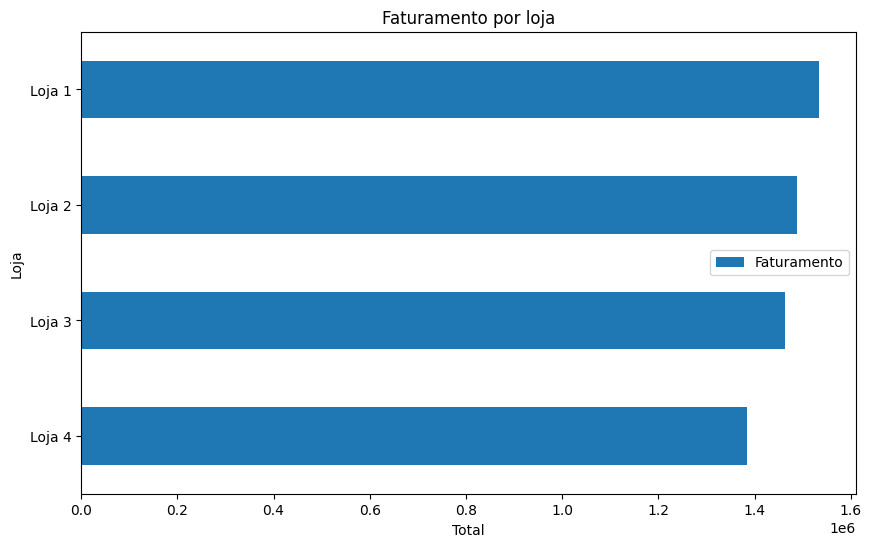

In [ ]:
faturamento = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    faturamento[nome] = df['Preço'].sum()

tabela = pd.DataFrame(list(faturamento.items()), columns=["Loja", "Faturamento"])
tabela = tabela.sort_values(by="Faturamento", ascending=True).reset_index(drop=True)
display(tabela)

tabela.plot(x="Loja", y="Faturamento", kind="barh", title="Faturamento por loja", figsize=(10, 6) , xlabel = 'Total')

<Axes: title={'center': 'Percentual do faturamento total por loja'}, ylabel='Faturamento'>

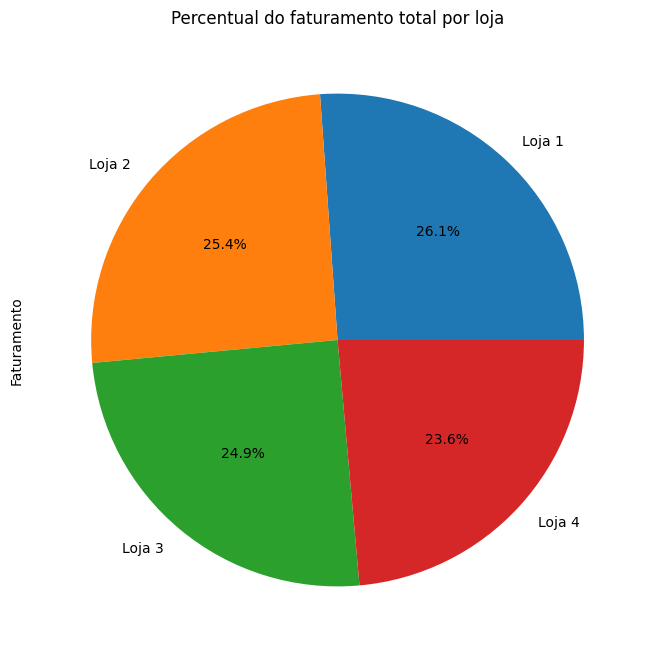

In [ ]:
tabela_total.set_index("Loja")["Faturamento"].plot(
    kind="pie",
    autopct="%.1f%%",
    figsize=(8, 8),
    title="Percentual do faturamento total por loja",
)

# 2. Vendas por Categoria


,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


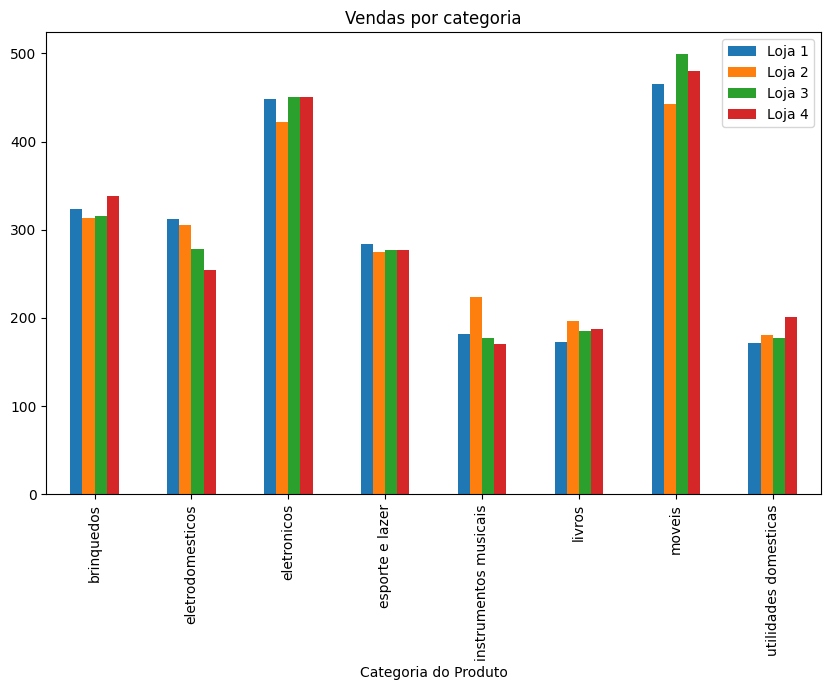

In [ ]:
vendas_por_categoria = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    vendas_por_categoria[nome] = df.groupby('Categoria do Produto')['Produto'].count()


tabela = pd.DataFrame(vendas_por_categoria)
tabela.plot(kind='bar', figsize=(10, 6), title = 'Vendas por categoria')
tabela

# 3. Média de Avaliação das Lojas

,Loja 1,Loja 2,Loja 3,Loja 4
0,3.976685,4.037304,4.048326,3.995759


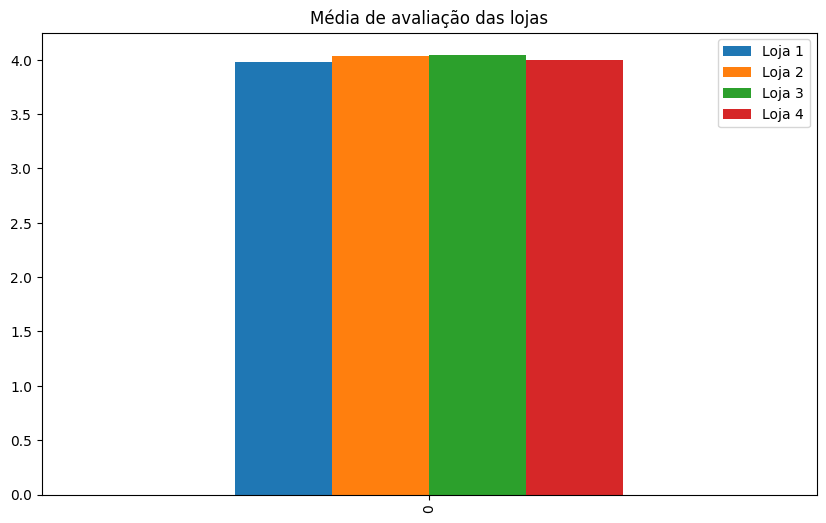

In [ ]:
media_avaliacao = {}
for nome, url in urls.items():
   df = pd.read_csv(url)
   media_avaliacao[nome] = df['Avaliação da compra'].mean()

tabela_medias = pd.DataFrame([media_avaliacao])
tabela_medias.plot(kind='bar', figsize=(10, 6), title = 'Média de avaliação das lojas')
tabela_medias

# 4. Produtos Mais e Menos Vendidos

### Através das análises dos gráficos é possível concluir que os 5 produtos que mais se destacam em cada unidade são eletrônicos e eletrodomésticos.
### Já os 5 produtos menos vendidos de cada unidades são brinquedos.

<Axes: title={'center': 'Loja 1'}, xlabel='Produto'>

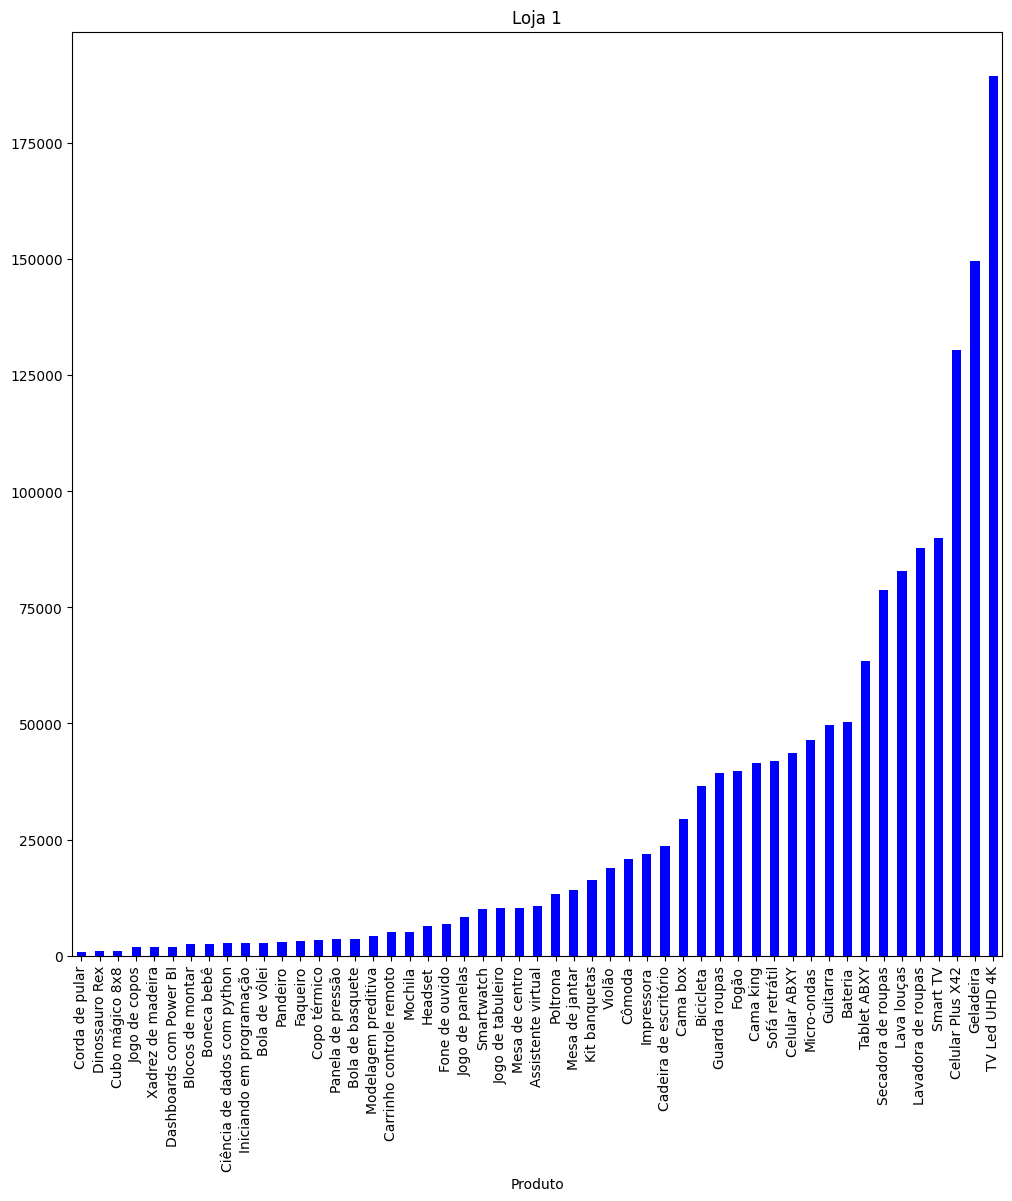

In [ ]:
produto_loja1 = loja.groupby("Produto")['Preço'].sum().sort_values()
produto_loja1.plot( kind='bar',figsize=(12,12), title= 'Loja 1', color='blue')

O produto mais vendido na loja 1 é "Tv Led UHD 4k". O produto menos vendido é "Corda de Pular"

<Axes: title={'center': 'Loja 2'}, xlabel='Produto'>

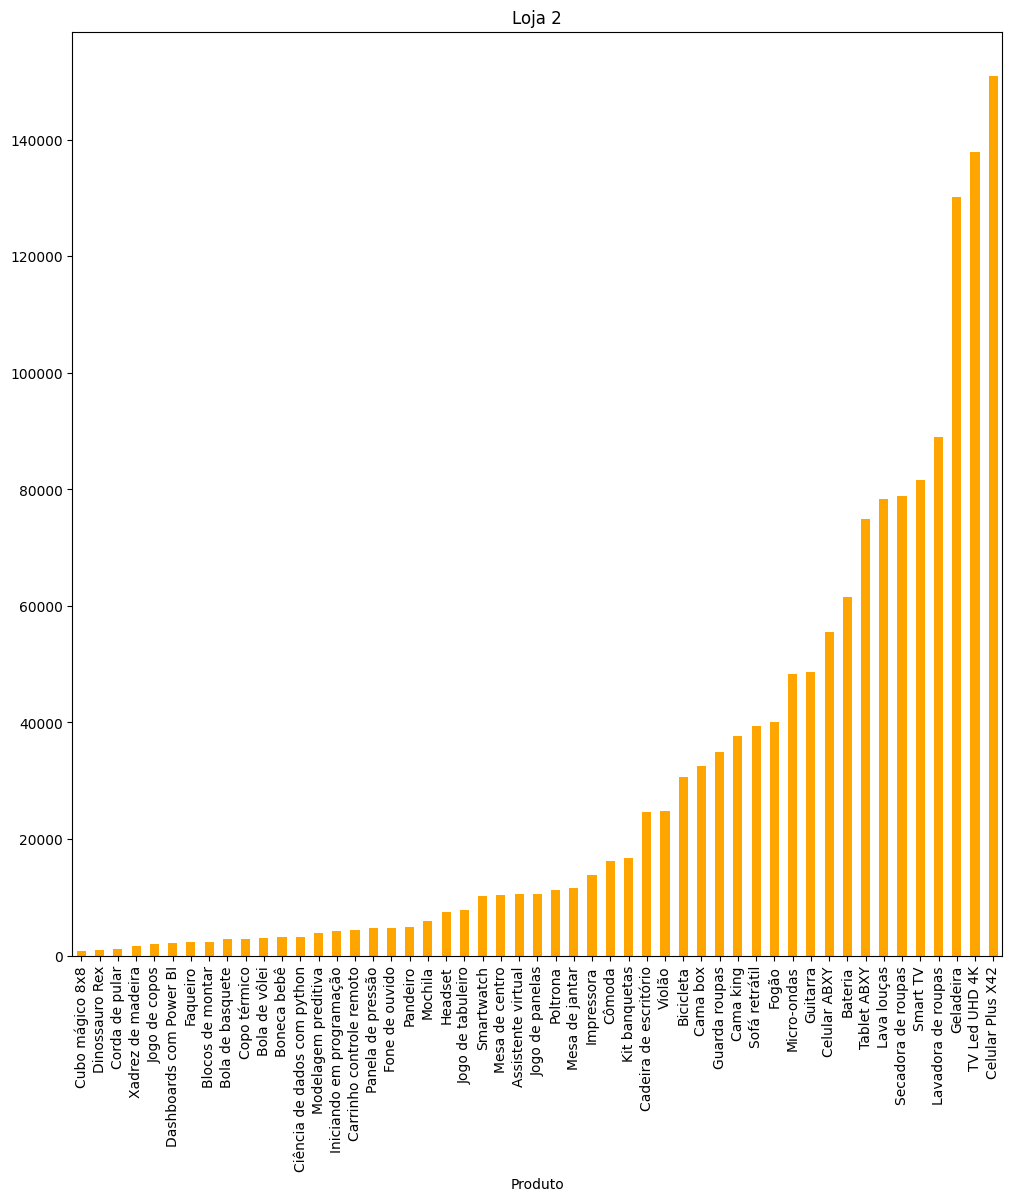

In [ ]:
produto_loja2 = loja2.groupby("Produto")['Preço'].sum().sort_values()
produto_loja2.plot( kind='bar',figsize=(12,12), title = 'Loja 2', color='orange')

O produto mais vendido na Loja 2 é "Celular Plus X42". O produto menos vendido é "Cubo Mágico 8x8".

<Axes: title={'center': 'Loja 3'}, xlabel='Produto'>

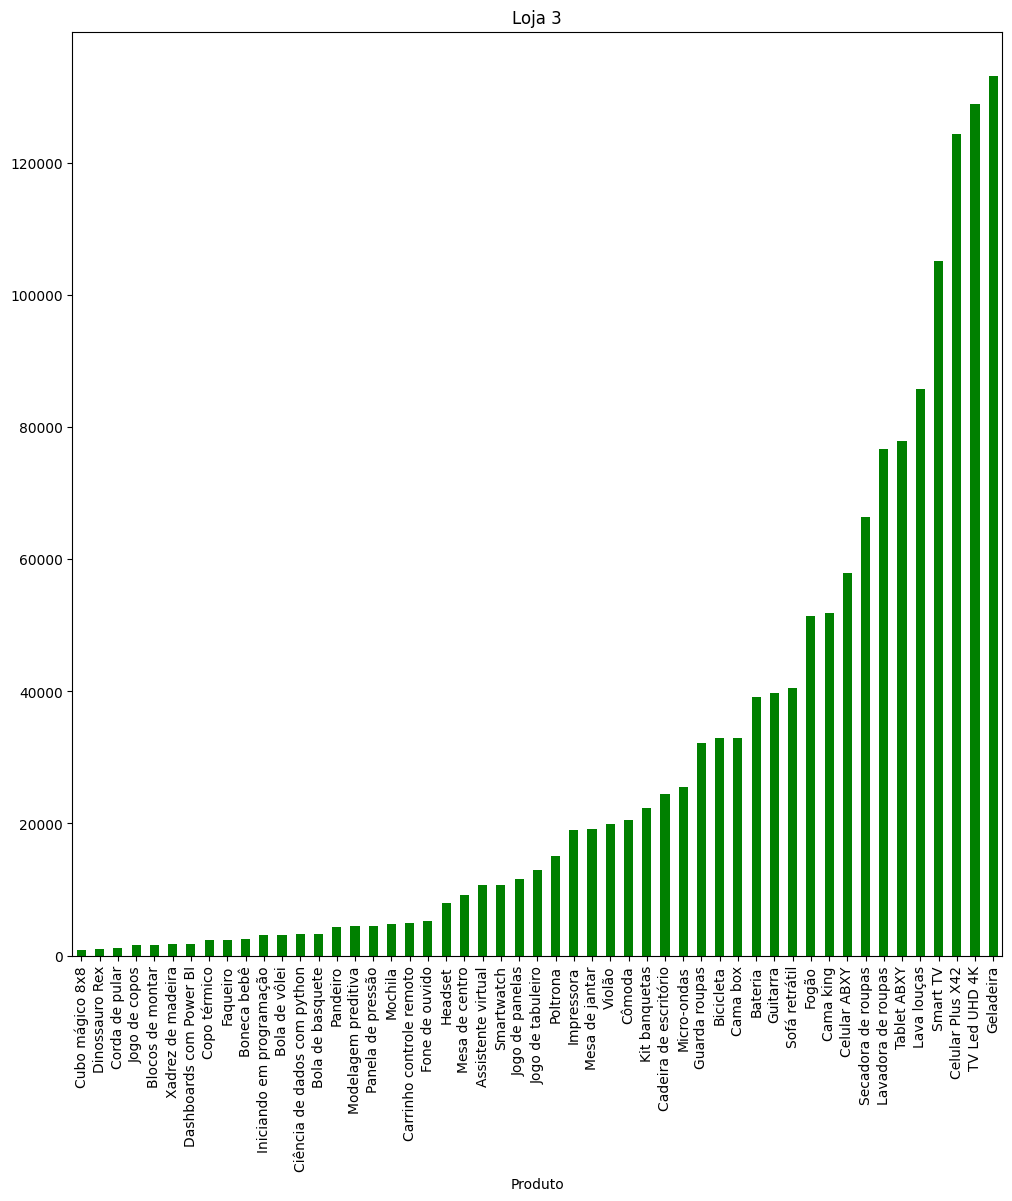

In [ ]:
produto_loja3 = loja3.groupby("Produto")['Preço'].sum().sort_values()
produto_loja3.plot( kind='bar',figsize=(12,12), title = 'Loja 3',color='green')

O produto mais vendido na Loja 3 é "Geladeira". O produto menos vendido é "Cubo mágico 8x8".

<Axes: title={'center': 'Loja 4'}, xlabel='Produto'>

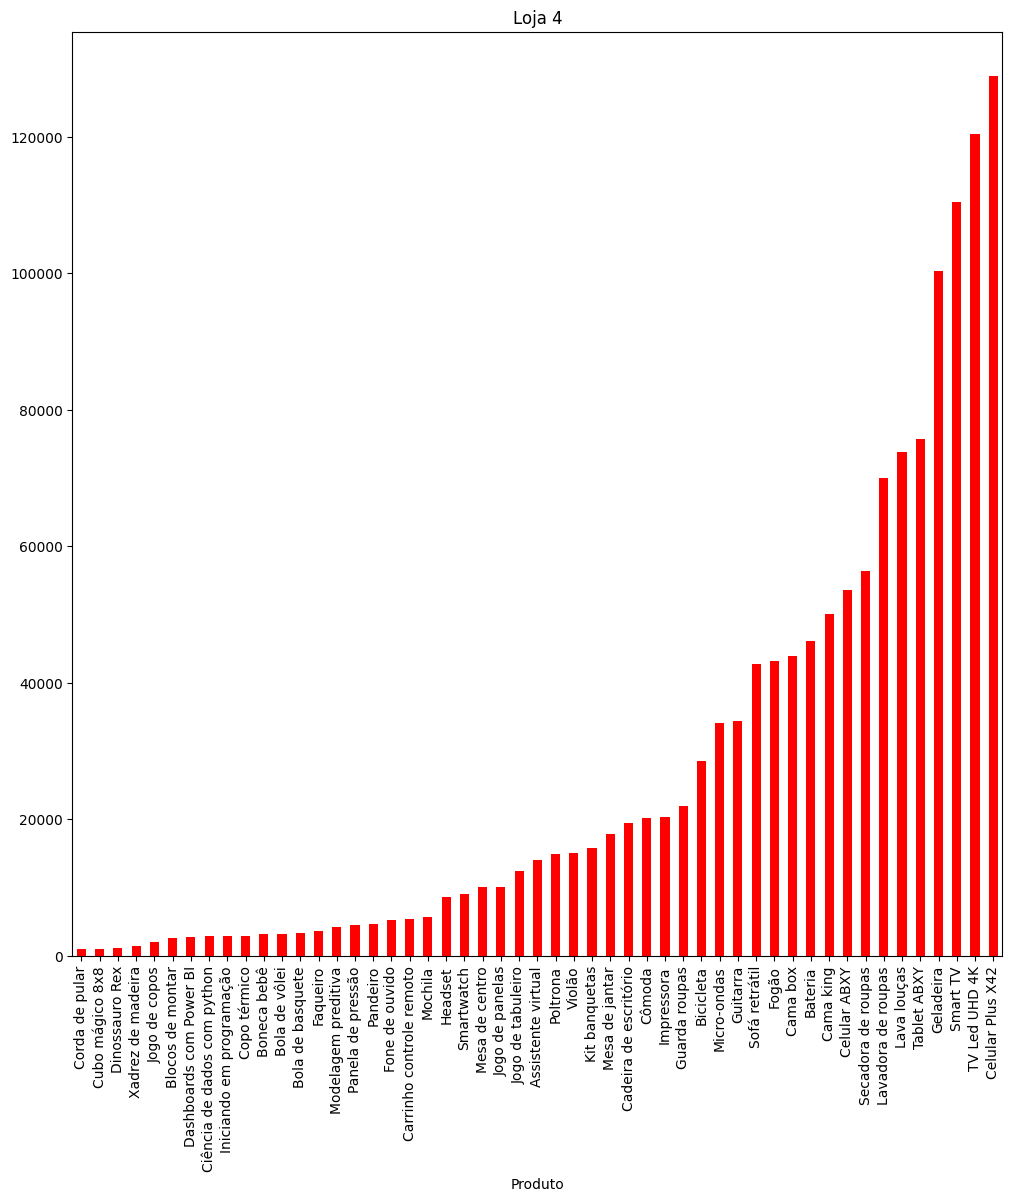

In [ ]:
produto_loja4 = loja4.groupby("Produto")['Preço'].sum().sort_values()
produto_loja4.plot( kind='bar',figsize=(12,12), title = 'Loja 4',color='red')

O produto mais vendido na Loja 4 é "Celular Plus x42". O produto menos vendido é "Corda de Pular".

# 5. Frete Médio por Loja


,Loja 1,Loja 2,Loja 3,Loja 4
0,34.691805,33.621941,33.074464,31.278997


<Axes: title={'center': 'Frete médio por loja'}>

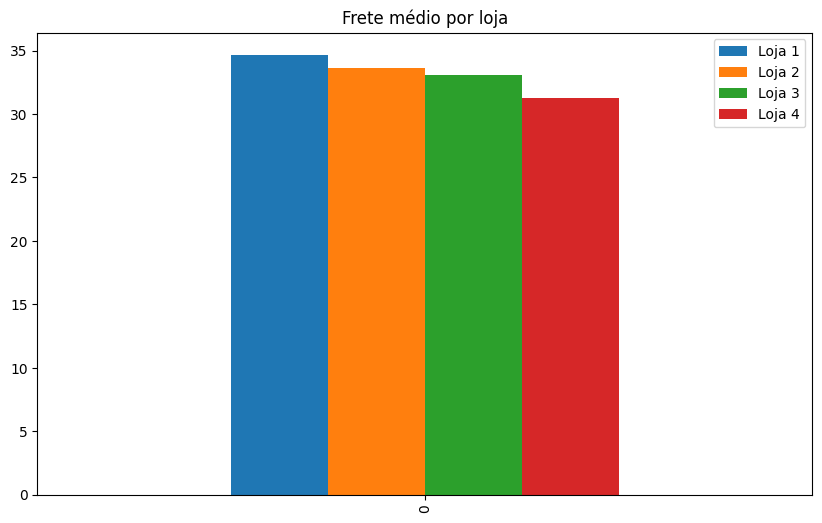

In [ ]:
frete_medio = {}
for nome, url in urls.items():
    df = pd.read_csv(url)
    frete_medio[nome] = df['Frete'].mean()
tabela_frete = pd.DataFrame([frete_medio])
display(tabela_frete)

tabela_frete.plot(kind='bar', title = 'Frete médio por loja', figsize=(10, 6))

## Relatório da análise da rede de lojas:


Primeiramente, a partir da análise dos dados realizada, é possível concluir que as Lojas 2 e 3 apresentam resultados equilibrados em todas as métricas analisadas e possuem as maiores avaliações dos clientes, não sendo, portanto, consideradas neste relatório como possíveis lojas a serem vendidas.

Ao observar as métricas da Loja 1, nota-se que esta apresenta o maior faturamento dentre as lojas da rede. Entretanto, também possui a menor média de satisfação dos clientes, o que pode indicar desafios no relacionamento com o consumidor. Além disso, o frete médio da Loja 1 é o mais alto entre as unidades; no entanto, não é possível concluir, com base nos dados disponíveis, se esse custo é absorvido pela loja ou repassado ao cliente.

Os produtos mais vendidos em todas as lojas da rede pertencem às categorias de eletrônicos e eletrodomésticos, enquanto os produtos menos vendidos são os brinquedos infantis.

A Loja 4 é responsável pela menor parcela do faturamento da rede e, além disso, apresenta a segunda menor média de avaliação dos consumidores.

Dessa forma, com base nos dados apresentados neste relatório, recomenda-se a venda da Loja 4, visando à otimização do funcionamento da rede, uma vez que esta unidade apresenta o menor desempenho entre as lojas analisadas.
